<a href="https://colab.research.google.com/github/AleynaAltunsu/neuroaesthetic-in-fashion/blob/main/crossvalidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

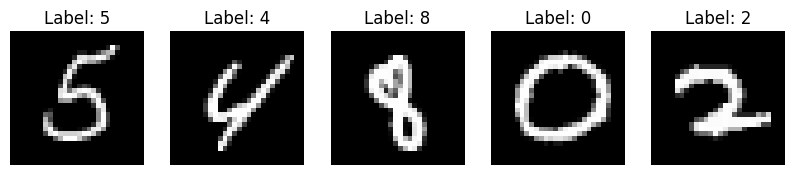

Train Set Boyutu: (5000, 784), Test Set Boyutu: (1000, 784)
Çapraz Doğrulama Doğruluk Skorları: [0.961 0.934 0.935 0.943 0.959]
Min Doğruluk: 0.934, Max Doğruluk: 0.961
RandomizedSearchCV En İyi Parametreler: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
RandomizedSearchCV Model Skoru: 0.9522001962152588
GridSearchCV En İyi Parametreler: {'C': 5.0, 'gamma': 'scale', 'kernel': 'rbf'}
GridSearchCV Model Skoru: 0.9530001562712668

Sonuçların Karşılaştırılması
Temel Model Skoru (CV Ort.): 0.9464
RandomizedSearchCV Skoru: 0.9522001962152588
GridSearchCV Skoru: 0.9530001562712668


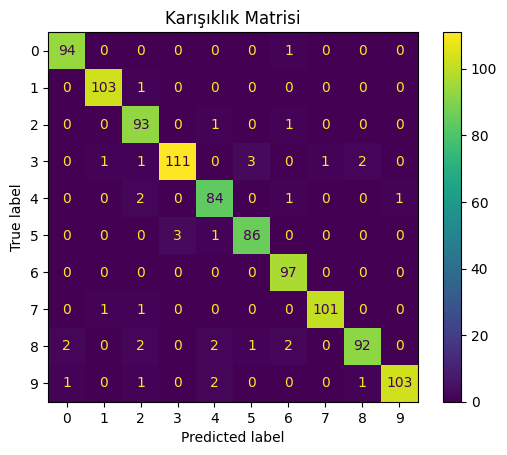

Test Seti Doğruluğu: 0.96


In [1]:
# Gerekli kütüphaneleri yükleme
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. MNIST Veri Kümesini Yükleme
# MNIST veri kümesini yükleme
mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Veriyi eğitim ve test setlerine ayırma
# Boyutları küçültmek için eğitim ve test setlerinden küçük bir örnekleme alınıyor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = X_train[:5000], y_train[:5000]  # Eğitim setini küçült
X_test, y_test = X_test[:1000], y_test[:1000]  # Test setini küçült

# 2. Veri Keşfi
# Örnek görüntülerin görselleştirilmesi
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, img, label in zip(axes, X_train[:5], y_train[:5]):
    ax.imshow(img.reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.show()

# Veri boyutlarının raporlanması
print(f'Train Set Boyutu: {X_train.shape}, Test Set Boyutu: {X_test.shape}')

# 3. Model Tanımlama
# SVM sınıflandırıcı
svm_model = SVC()

# 4. Çapraz Doğrulama
# 5 katlı Çapraz Doğrulama ile doğruluk hesaplama
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print(f'Çapraz Doğrulama Doğruluk Skorları: {cv_scores}')
print(f'Min Doğruluk: {cv_scores.min()}, Max Doğruluk: {cv_scores.max()}')

# 5. Hiperparametre Optimizasyonu (RandomizedSearchCV)
param_distributions = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

random_search = RandomizedSearchCV(svm_model, param_distributions, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train, y_train)
print(f'RandomizedSearchCV En İyi Parametreler: {random_search.best_params_}')
print(f'RandomizedSearchCV Model Skoru: {random_search.best_score_}')

# 6. Hiperparametre Optimizasyonu (GridSearchCV)
param_grid = {
    'C': [random_search.best_params_['C'] / 2, random_search.best_params_['C'], random_search.best_params_['C'] * 2],
    'gamma': [random_search.best_params_['gamma']],
    'kernel': [random_search.best_params_['kernel']]
}

grid_search = GridSearchCV(svm_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(f'GridSearchCV En İyi Parametreler: {grid_search.best_params_}')
print(f'GridSearchCV Model Skoru: {grid_search.best_score_}')

# 7. Sonuçların Karşılaştırılması
print("\nSonuçların Karşılaştırılması")
print(f'Temel Model Skoru (CV Ort.): {cv_scores.mean()}')
print(f'RandomizedSearchCV Skoru: {random_search.best_score_}')
print(f'GridSearchCV Skoru: {grid_search.best_score_}')

# 8. En İyi Modelin Değerlendirilmesi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Karışıklık matrisinin görselleştirilmesi
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=best_model.classes_).plot(cmap='viridis')
plt.title('Karışıklık Matrisi')
plt.show()

# Test seti doğruluğu
accuracy = (y_test == y_pred).mean()
print(f'Test Seti Doğruluğu: {accuracy:.2f}')


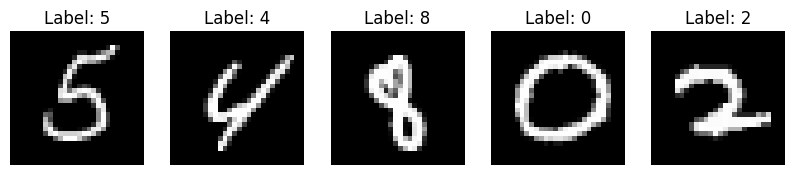

Train Set Boyutu: (56000, 784), Test Set Boyutu: (14000, 784)
Çapraz Doğrulama Doğruluk Skorları: [0.976875   0.97767857 0.97848214 0.9775     0.97642857]
Min Doğruluk: 0.9764285714285714, Max Doğruluk: 0.9784821428571429


In [ ]:
#TRAIN VE TEST SET ÇOK BÜYÜK OLDUĞU İÇİN BU VERSİYON ÇALIŞAMDI
# Gerekli kütüphaneleri yükleme
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. MNIST Veri Kümesini Yükleme
# MNIST veri kümesini yükleme
mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Veri Keşfi
# Örnek görüntülerin görselleştirilmesi
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, img, label in zip(axes, X_train[:5], y_train[:5]):
    ax.imshow(img.reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.show()

# Veri boyutlarının raporlanması
print(f'Train Set Boyutu: {X_train.shape}, Test Set Boyutu: {X_test.shape}')

# 3. Model Tanımlama
# SVM sınıflandırıcı
svm_model = SVC()

# 4. Çapraz Doğrulama
# 5 katlı Çapraz Doğrulama ile doğruluk hesaplama
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print(f'Çapraz Doğrulama Doğruluk Skorları: {cv_scores}')
print(f'Min Doğruluk: {cv_scores.min()}, Max Doğruluk: {cv_scores.max()}')

# 5. Hiperparametre Optimizasyonu (RandomizedSearchCV)
param_distributions = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

random_search = RandomizedSearchCV(svm_model, param_distributions, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train, y_train)
print(f'RandomizedSearchCV En İyi Parametreler: {random_search.best_params_}')
print(f'RandomizedSearchCV Model Skoru: {random_search.best_score_}')

# 6. Hiperparametre Optimizasyonu (GridSearchCV)
param_grid = {
    'C': [random_search.best_params_['C'] / 2, random_search.best_params_['C'], random_search.best_params_['C'] * 2],
    'gamma': [random_search.best_params_['gamma']],
    'kernel': [random_search.best_params_['kernel']]
}

grid_search = GridSearchCV(svm_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(f'GridSearchCV En İyi Parametreler: {grid_search.best_params_}')
print(f'GridSearchCV Model Skoru: {grid_search.best_score_}')

# 7. Sonuçların Karşılaştırılması
print("\nSonuçların Karşılaştırılması")
print(f'Temel Model Skoru (CV Ort.): {cv_scores.mean()}')
print(f'RandomizedSearchCV Skoru: {random_search.best_score_}')
print(f'GridSearchCV Skoru: {grid_search.best_score_}')

# 8. En İyi Modelin Değerlendirilmesi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Karışıklık matrisinin görselleştirilmesi
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=best_model.classes_).plot(cmap='viridis')
plt.title('Karışıklık Matrisi')
plt.show()

# Test seti doğruluğu
accuracy = (y_test == y_pred).mean()
print(f'Test Seti Doğruluğu: {accuracy:.2f}')

